In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm_notebook as tqdm
from imblearn.over_sampling import SMOTE

In [2]:
train_data = pd.read_csv('../input/train.csv')
test_data = pd.read_csv("../input/test.csv")
image_folder_path = "../input/images/"

In [3]:
arr = train_data["image_id"]
train_images = [i for i in arr]  

arr = test_data["image_id"]
test_images = [i for i in arr]

In [4]:
def load_image(image_id) : 
    image_path = image_folder_path +image_id +".jpg"
    image = cv2.imread(image_path) 
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

def resize(image, image_size):
    image = cv2.resize(image, (image_size[0], image_size[1]), interpolation = cv2.INTER_AREA)
    return image

## Data Analysis

In [5]:
def extract_classes(s):
    """
    s can be either of the four classes mentioned above.
    """ 
    t = train_data[train_data[s] == 1] 
    arr = t["image_id"]
    images = [i for i in tqdm(arr)]
    train_images = [load_image(i) for i in tqdm(images)]
    return train_images

classes = ["healthy", "multiple_diseases", "rust", "scab"] 

In [6]:
count_healthy = len(train_data[train_data["healthy"] == 1])
count_diseased = len(train_data[train_data["multiple_diseases"] == 1])
count_rust = len(train_data[train_data["rust"] == 1])
count_scab = len(train_data[train_data["scab"] == 1])

print(count_healthy)
print(count_diseased)
print(count_rust)
print(count_scab)
print(count_healthy + count_diseased + count_rust +  count_scab)

516
91
622
592
1821


(-1.1527958829887197,
 1.1533529919548287,
 -1.1585919775752163,
 1.1357509855075638)

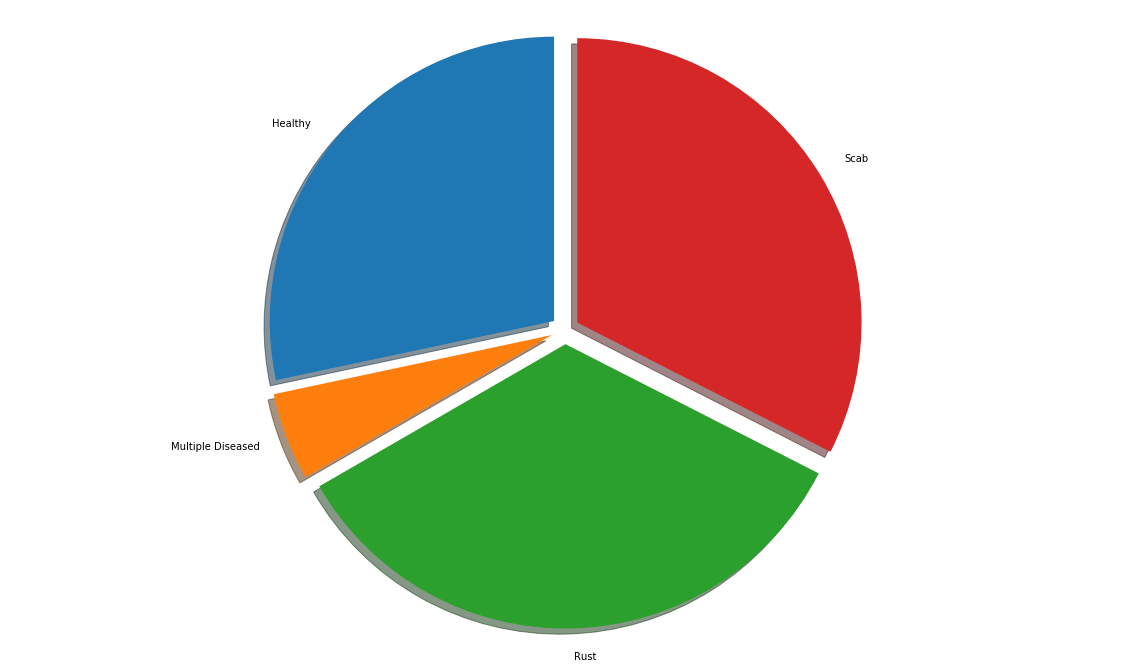

In [7]:
# observe number of cases present in each class
labels = ["Healthy", "Multiple Diseased", "Rust", "Scab"]
counts = [count_healthy, count_diseased, count_rust, count_scab]
explode = (0.05, 0.05, 0.05, 0.05)
fig, ax = plt.subplots(figsize = (20, 12))
ax.pie(counts, explode = explode, labels = labels, shadow = True, startangle = 90)
ax.axis("equal") # equal aspect ratio ensures pie graph is drawn as circle

In [8]:
red , green, blue = [], [], []

In [9]:
healthy = extract_classes("healthy")
for image in healthy :
    mean_red = np.mean(image[:,:,0])
    mean_green = np.mean(image[:,:,1])
    mean_blue = np.mean(image[:,:,2])
    
    red.append(mean_red)
    green.append(mean_green)
    blue.append(mean_blue)
    
healthy_image_1 = healthy[100]
healthy_image_2 = healthy[200]
healthy_image_3 = healthy[300]
del healthy # free memory

md = extract_classes("multiple_diseases")
for image in md : 
    mean_red = np.mean(image[:,:,0])
    mean_green = np.mean(image[:,:,1])
    mean_blue = np.mean(image[:,:,2])
    
    red.append(mean_red)
    green.append(mean_green)
    blue.append(mean_blue)
md_image_1 = md[1]
md_image_2 = md[5]
md_image_3 = md[10]
del md # free memory

rust = extract_classes("rust")
for image in rust : 
    mean_red = np.mean(image[:,:,0])
    mean_green = np.mean(image[:,:,1])
    mean_blue = np.mean(image[:,:,2])
    
    red.append(mean_red)
    green.append(mean_green)
    blue.append(mean_blue)
rust_image_1 = rust[10]
rust_image_2 = rust[20] 
rust_image_3 = rust[30]
del rust # free memory

scab = extract_classes("healthy")
for image in scab : 
    mean_red = np.mean(image[:,:,0])
    mean_green = np.mean(image[:,:,1])
    mean_blue = np.mean(image[:,:,2])
    
    red.append(mean_red)
    green.append(mean_green)
    blue.append(mean_blue)
scab_image_1 = scab[10]
scab_image_2 = scab[20]
scab_image_3 = scab[30] 
del scab # free memory

image_collection = [healthy_image_1, healthy_image_2, healthy_image_3, 
                   md_image_1, md_image_2, md_image_3,
                   rust_image_1, rust_image_2, rust_image_3,
                   scab_image_1, scab_image_2, scab_image_3]   

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


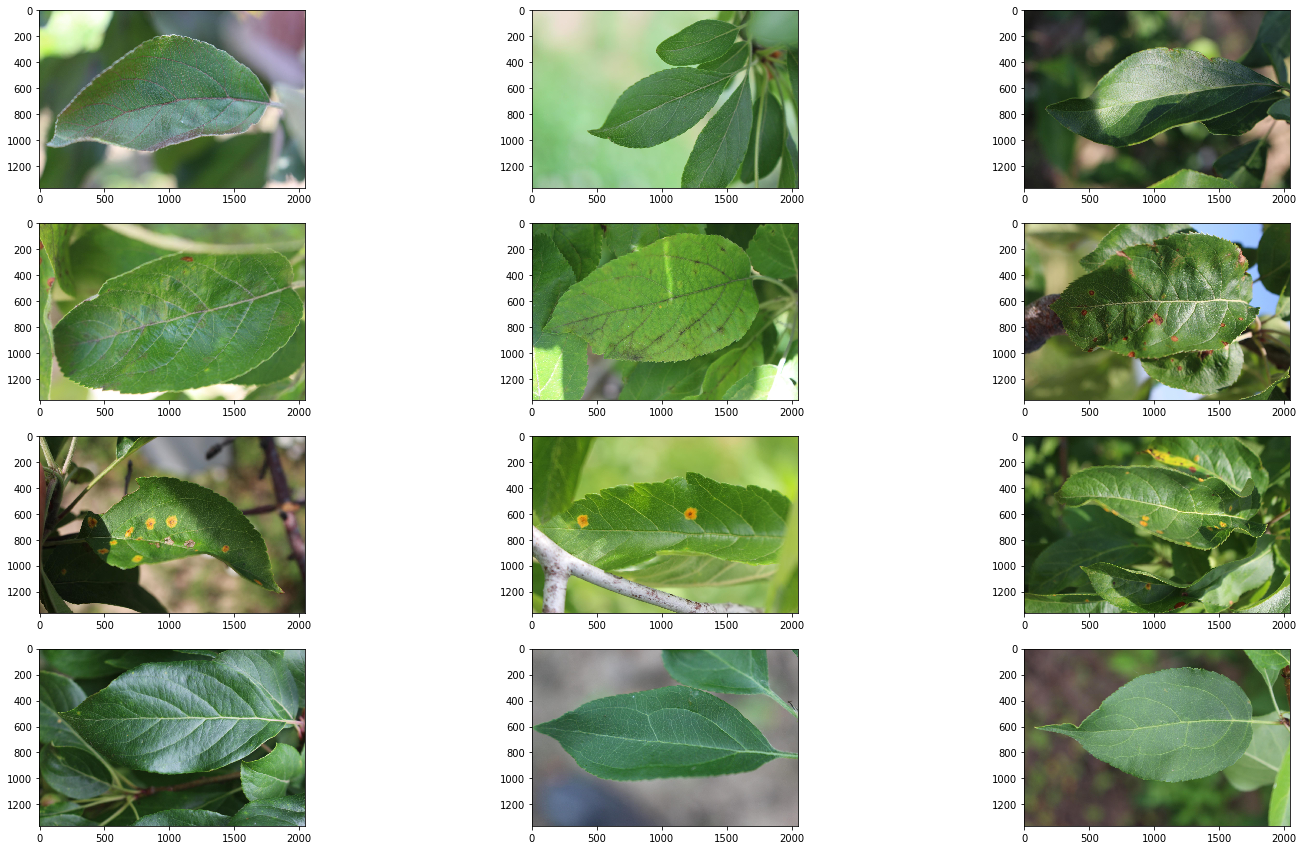

In [10]:
fig, ax = plt.subplots(nrows = 4, ncols = 3, figsize = (25, 15))
for i in range(12):
    ax[i//3, i%3].imshow(image_collection[i]) 

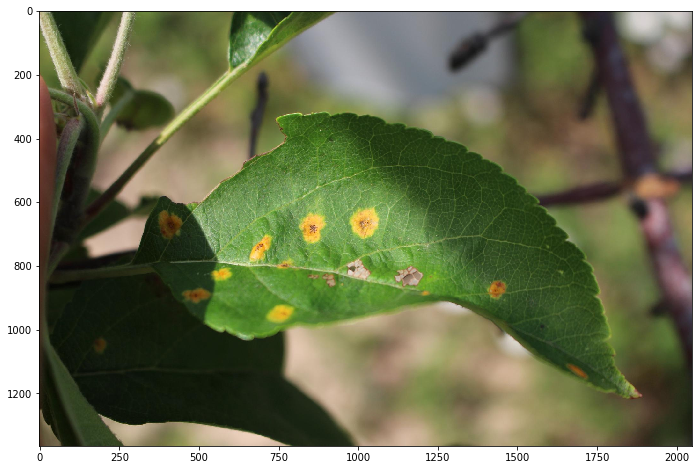

In [11]:
sample_image = rust_image_1
plt.figure(figsize = (12, 8))
plt.imshow(sample_image)

In [12]:
def non_local_means_denoising(image) : 
    denoised_image = cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 21)
    return denoised_image

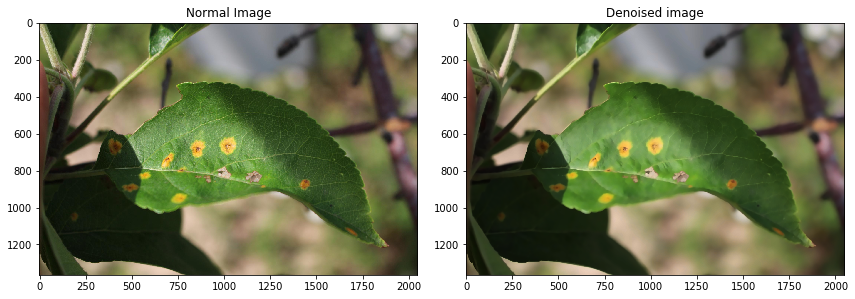

In [13]:
denoised_image = non_local_means_denoising(sample_image)

plt.figure(figsize = (12, 8))
plt.subplot(1,2,1)
plt.imshow(sample_image, cmap = "gray")
plt.grid(False)
plt.title("Normal Image")

plt.subplot(1,2,2)  
plt.imshow(denoised_image, cmap = "gray")
plt.grid(False)
plt.title("Denoised image")    
# Automatically adjust subplot parameters to give specified padding.
plt.tight_layout()

In [14]:
def sobel_edge_detection(image):
    """
    Using Sobel filter

    Sobel filter takes the following arguments : 
    1. Original Image
    2. Depth of the destination image
    3. Order of derivative x
    4. Order of derivative y
    5. Kernel size for convolutions

    f(Image, depth, order_dx, order_dy, kernel_size) 
    """
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize = 5)
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize = 5)
    return sobel_x, sobel_y

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


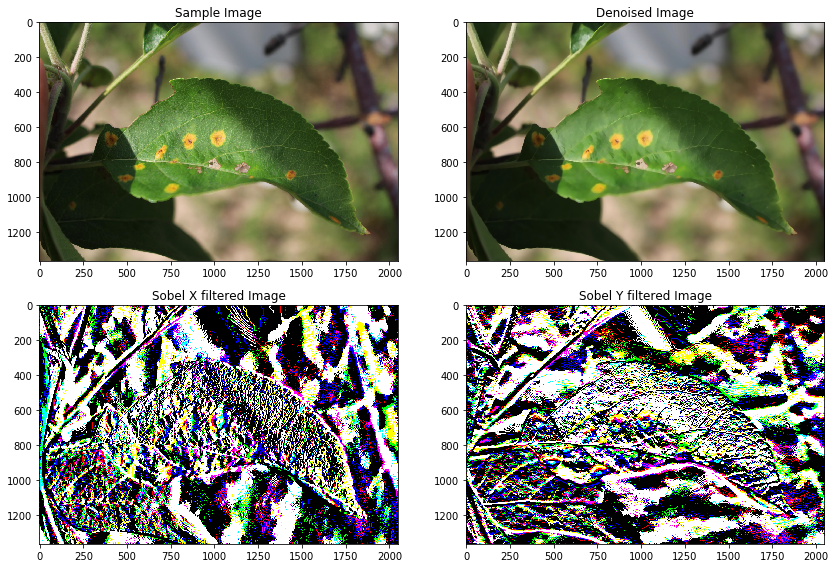

In [15]:
s_img_x, s_img_y = sobel_edge_detection(denoised_image)

plt.figure(figsize = (12, 8))
plt.subplot(2,2,1)
plt.imshow(sample_image, cmap = "gray")
plt.grid(False)
plt.title("Sample Image")

plt.subplot(2,2,2)
plt.imshow(denoised_image, cmap = "gray")
plt.grid(False)
plt.title("Denoised Image")

plt.subplot(2,2,3)
plt.imshow(s_img_x, cmap = "gray")
plt.grid(False)
plt.title("Sobel X filtered Image")

plt.subplot(2,2,4)
plt.imshow(s_img_y, cmap = "gray")
plt.grid(False)
plt.title("Sobel Y filtered Image")

# Automatically adjust subplot parameters to give specified padding.
plt.tight_layout()

In [16]:
from collections import deque
def canny_edge_detection(image):
    edges = cv2.Canny(image, 170, 200) 
    return edges

def primary_roi(original_image, edge_image):
    edge_coordinates = deque()
    for i in tqdm(range(edge_image.shape[0])):
        for j in range(edge_image.shape[1]):
            if edge_image[i][j] != 0 :
                edge_coordinates.append((i, j))
  
    min_row = edge_coordinates[np.argsort([coordinate[0] for coordinate in edge_coordinates])[0]][0]
    max_row = edge_coordinates[np.argsort([coordinate[0] for coordinate in edge_coordinates])[-1]][0]
    min_col = edge_coordinates[np.argsort([coordinate[1] for coordinate in edge_coordinates])[0]][1]
    max_col = edge_coordinates[np.argsort([coordinate[1] for coordinate in edge_coordinates])[-1]][1]

    new_image = original_image.copy()
    new_edge_image = edge_image.copy()

    new_image[min_row - 10 : min_row + 10, min_col : max_col] = [255, 0, 0]
    new_image[max_row - 10 : max_row + 10, min_col : max_col] = [255, 0, 0]
    new_image[min_row : max_row , min_col - 10 : min_col + 10] = [255, 0, 0]
    new_image[min_row : max_row , max_col - 10 : max_col + 10] = [255, 0, 0]

    new_edge_image[min_row - 10 : min_row + 10, min_col : max_col] = [255]
    new_edge_image[max_row - 10 : max_row + 10, min_col : max_col] = [255]
    new_edge_image[min_row : max_row , min_col - 10 : min_col + 10] = [255]
    new_edge_image[min_row : max_row , max_col - 10 : max_col + 10] = [255]

    roi_image = new_image[min_row : max_row, min_col : max_col]
    edge_roi_image = new_edge_image[min_row : max_row, min_col : max_col]


    return roi_image, edge_roi_image

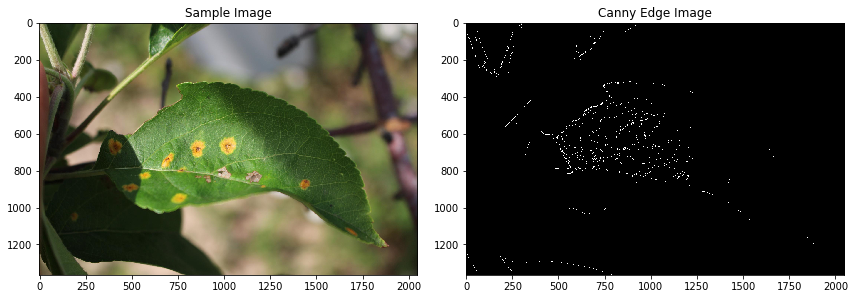

In [17]:
plt.figure(figsize = (12, 8))
plt.subplot(1,2,1)
plt.imshow(sample_image, cmap = "gray")
plt.grid(False)
plt.title("Sample Image")

edge_image = canny_edge_detection(sample_image) 

plt.subplot(1,2,2)
plt.imshow(edge_image, cmap = "gray")
plt.grid(False)
plt.title("Canny Edge Image")
# Automatically adjust subplot parameters to give specified padding.
plt.tight_layout()

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


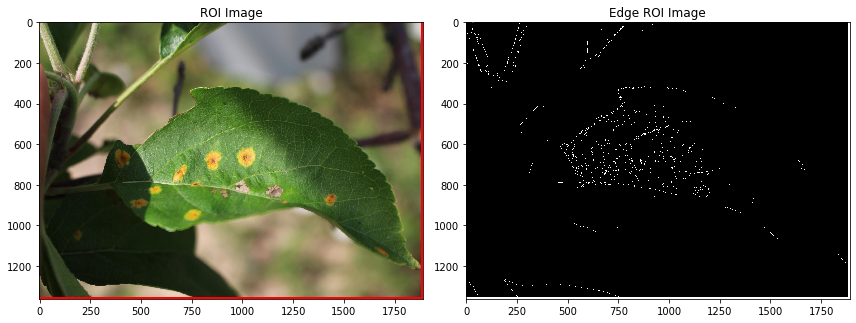

In [18]:
roi_image, edge_roi_image = primary_roi(sample_image, edge_image)

plt.figure(figsize = (12, 8))
plt.subplot(1,2,1)
plt.imshow(roi_image, cmap = "gray")
plt.grid(False)
plt.title("ROI Image")

plt.subplot(1,2,2)
plt.imshow(edge_roi_image, cmap = "gray")
plt.grid(False)
plt.title("Edge ROI Image")  
# Automatically adjust subplot parameters to give specified padding.
plt.tight_layout()

In [19]:
def histogram_equalization(roi_image):
    image_ycrcb = cv2.cvtColor(roi_image, cv2.COLOR_RGB2YCR_CB)
    y_channel = image_ycrcb[:, :, 0] # apply histogram equalization on this channel
    cr_channel = image_ycrcb[:, :, 1]
    cb_channel = image_ycrcb[:, :, 2]
    # local histogram equalization
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    equalized = clahe.apply(y_channel)
    equalized_image = cv2.merge([equalized, cr_channel, cb_channel])
    equalized_image = cv2.cvtColor(equalized_image, cv2.COLOR_YCR_CB2RGB)
    return equalized_image

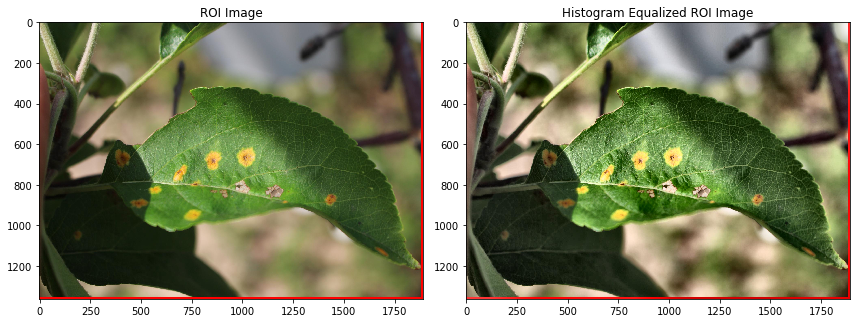

In [20]:
equalized_roi_image = histogram_equalization(roi_image)

plt.figure(figsize = (12, 8))
plt.subplot(1,2,1)
plt.imshow(roi_image, cmap = "gray")
plt.grid(False)
plt.title("ROI Image")

plt.subplot(1,2,2)
plt.imshow(equalized_roi_image, cmap = "gray")
plt.grid(False)
plt.title("Histogram Equalized ROI Image")  
# Automatically adjust subplot parameters to give specified padding.
plt.tight_layout()

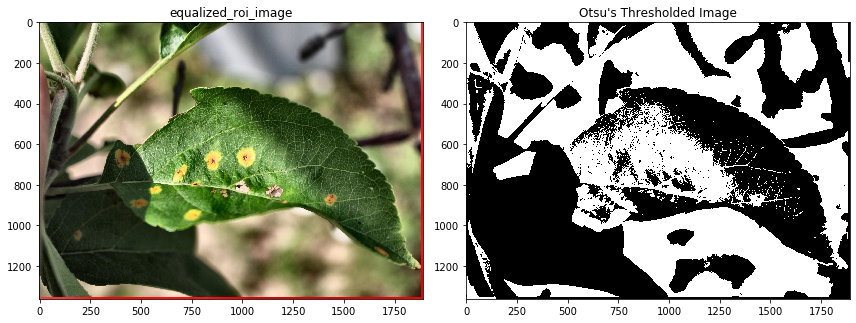

In [21]:
otsu_threshold, otsu_image = cv2.threshold(cv2.cvtColor(equalized_roi_image, cv2.COLOR_RGB2GRAY), 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.figure(figsize = (12, 8))
plt.subplot(1,2,1)
plt.imshow(equalized_roi_image, cmap = "gray")
plt.grid(False)
plt.title("equalized_roi_image")

plt.subplot(1,2,2)
plt.imshow(otsu_image, cmap = "gray")
plt.grid(False)
plt.title("Otsu's Thresholded Image")  
# Automatically adjust subplot parameters to give specified padding.

plt.tight_layout()

In [22]:
def segmentation(image, k, attempts) : 
    vectorized = np.float32(image.reshape((-1, 3)))
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 1.0)
    res , label , center = cv2.kmeans(vectorized, k, None, criteria, attempts, cv2.KMEANS_PP_CENTERS)
    center = np.uint8(center)
    res = center[label.flatten()]
    segmented_image = res.reshape((image.shape))
    return segmented_image

Text(0.5, 1.0, 'Segmented Image with k = 5')

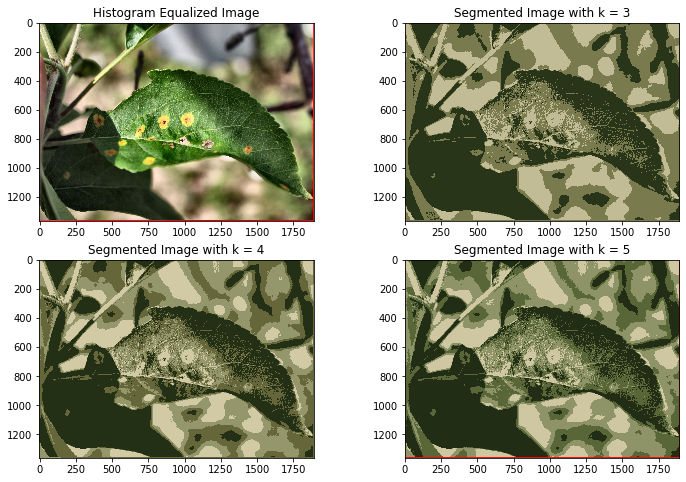

In [23]:
plt.figure(figsize = (12, 8))
plt.subplot(2,2,1)
plt.imshow(equalized_roi_image, cmap = "gray")
plt.grid(False)
plt.title("Histogram Equalized Image")

segmented_image = segmentation(equalized_roi_image, 3, 10) # k = 3, attempt = 10
plt.subplot(2,2,2)
plt.imshow(segmented_image, cmap = "gray")
plt.grid(False)
plt.title("Segmented Image with k = 3")

segmented_image = segmentation(equalized_roi_image, 4, 10) # k = 4, attempt = 10
plt.subplot(2,2,3)
plt.imshow(segmented_image, cmap = "gray")
plt.grid(False)
plt.title("Segmented Image with k = 4")

segmented_image = segmentation(equalized_roi_image, 5, 10) # k = 5, attempt = 10
plt.subplot(2,2,4)
plt.imshow(segmented_image, cmap = "gray")
plt.grid(False)
plt.title("Segmented Image with k = 5")

In [24]:
IMAGE_SIZE = (224, 224, 3)

In [25]:
train_image = []

for id_ in train_data["image_id"]:
    image = load_image(id_)
    image = resize(image, IMAGE_SIZE)
    
    edge_image = canny_edge_detection(image)
    roi_image, _ = primary_roi(image, edge_image)
    equalized_roi_image = histogram_equalization(roi_image)
    
    train_image.append(image)

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [26]:
x_train = np.array(train_image)
x_train = x_train/255.0

In [27]:
y = train_data.copy()
del y['image_id']
y_train = np.array(y.values)

In [28]:
print(x_train.shape)
print(y_train.shape)

(1821, 224, 224, 3)
(1821, 4)


In [29]:
# Handling Missing values and as there is less number of multiple_diseases
# as compared to others we will equalize them using SMOTE
# More Info: https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

smote = SMOTE(random_state = 115)
x_train, y_train = smote.fit_resample(x_train.reshape((-1, IMAGE_SIZE[0] * IMAGE_SIZE[1] * 3)), y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass classes=[0 1 2 3] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


In [30]:
x_train = x_train.reshape((-1, IMAGE_SIZE[0], IMAGE_SIZE[1], 3))
print(x_train.shape)
print(y_train.shape)

(2488, 224, 224, 3)
(2488, 4)


In [31]:
def label_count(label) :    
    count = 0 
    for entry in y_train :
        if np.array_equal(label, entry):    
            count += 1
    return count  

In [32]:
healthy = np.array([1,0,0,0])
multiple_diseases = np.array([0,1,0,0])
rust = np.array([0,0,1,0])
scab = np.array([0,0,0,1])

(-1.13889087296526, 1.13889087296526, -1.13889087296526, 1.13889087296526)

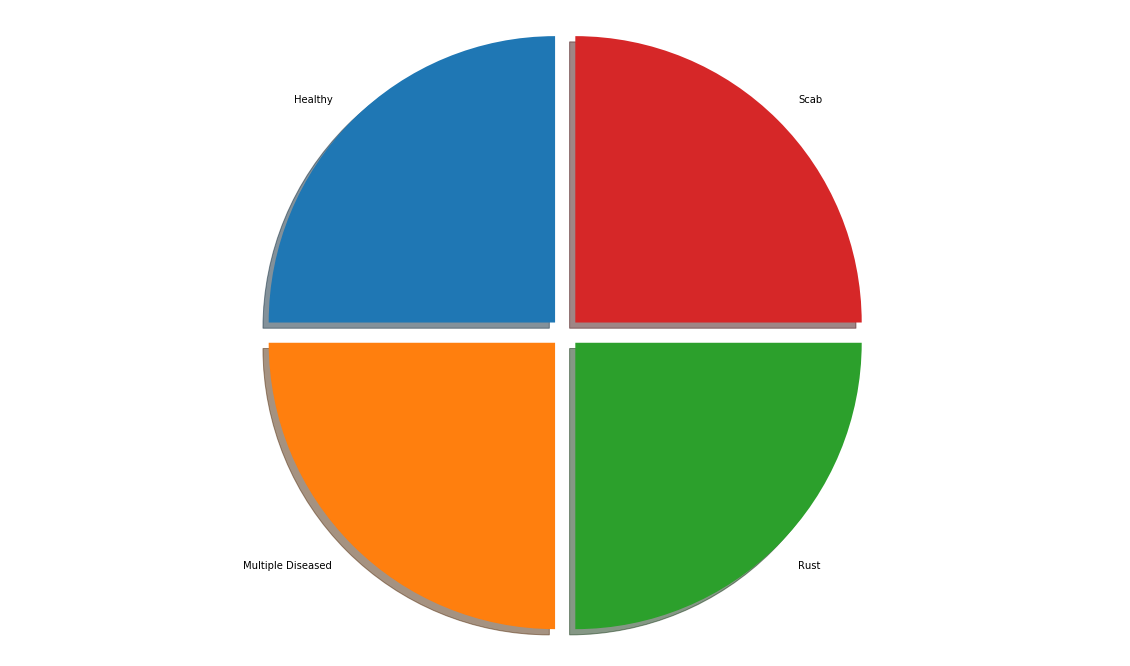

In [33]:
count_healthy = label_count(healthy)
count_multiple_diseases = label_count(multiple_diseases)
count_rust = label_count(rust)
count_scab = label_count(scab)

labels = ["Healthy", "Multiple Diseased", "Rust", "Scab"]
counts = [count_healthy, count_multiple_diseases, count_rust, count_scab]
explode = (0.05, 0.05, 0.05, 0.05)
fig, ax = plt.subplots(figsize = (20, 12))
ax.pie(counts, explode = explode, labels = labels, shadow = True, startangle = 90)
ax.axis("equal") # equal aspect ratio ensures pie graph is drawn as circle

In [34]:
VALIDATION_FACTOR = 0.1

val_size = int(len(x_train) * VALIDATION_FACTOR)

train_x = x_train[: len(x_train) - val_size]
train_y = y_train[: len(y_train) - val_size] # len(x_train) = len(y_train)

val_x = x_train[len(x_train) - val_size : len(x_train)]
val_y = y_train[len(y_train) - val_size : len(y_train)]

print("Shape of training data = ", train_x.shape, train_y.shape)
print("Shape of validation data = ", val_x.shape, val_y.shape)

Shape of training data =  (2240, 224, 224, 3) (2240, 4)
Shape of validation data =  (248, 224, 224, 3) (248, 4)


Image label =  [0 0 0 1]


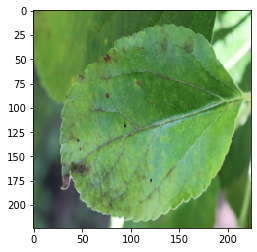

In [35]:
sample_image = train_x[250]
plt.imshow(sample_image)
plt.grid(False)
print("Image label = ", train_y[250])

In [36]:
# Early Stopping
from pytorch_lightning import Trainer
from pytorch_lightning.callbacks import EarlyStopping

monitor_es = EarlyStopping(monitor = "val_loss", patience = 25)

In [37]:
monitor_es

In [38]:
import torch
from torch import nn
import torch.nn.functional as F

In [39]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [45]:
import tensorflow as tf
vgg = tf.keras.applications.vgg16.VGG16(include_top = False, weights = "imagenet", input_shape = IMAGE_SIZE)

58892288/58889256 [==============================] - 24s 0us/step


In [46]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [49]:
print(vgg.input)
print(vgg.layers[-1].output)

Tensor("input_1:0", shape=(None, 224, 224, 3), dtype=float32)
Tensor("block5_pool/MaxPool:0", shape=(None, 7, 7, 512), dtype=float32)


In [51]:
output = vgg.layers[-1].output
output = tf.keras.layers.GlobalAveragePooling2D()(output)
vgg_model = tf.keras.models.Model(vgg.input, output)

In [52]:
vgg_model.trainable = True
set_trainable = False

In [53]:
for layer in vgg_model.layers : 
    if layer.name in ['block5_conv1', 'block4_conv1']:
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [54]:
pd.set_option("max_colwidth", -1)
info = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
analysis = pd.DataFrame(info, columns = ["Layer Type", "Layer Name", "Train Status"])
analysis

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


Layer Type  \
0   <tensorflow.python.keras.engine.input_layer.InputLayer object at 0x000001D795F81648>           
1   <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001D7C7B81688>             
2   <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001D7C7BC5C08>             
3   <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x000001D7C7C23B88>             
4   <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001D7C7C2B688>             
5   <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001D7C7C2BE48>             
6   <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x000001D7C7C32E08>             
7   <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001D7C7C3D8C8>             
8   <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001D7C7C3DCC8>             
9   <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001D7C7C40FC8>             
10  <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x000001D7C7C4ABC8>             
11  <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001D7C7C526C8>             
12  <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001D7C7C52F48>             
13  <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001D7C7C58E48>             
14  <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x000001D7C7C5CA08>             
15  <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001D7C7C68508>             
16  <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001D7C7C68C08>             
17  <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001D7C7C6EC88>             
18  <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x000001D7C7C75888>             
19  <tensorflow.python.keras.layers.pooling.GlobalAveragePooling2D object at 0x000001D7C7CE0808>   

                  Layer Name  Train Status  
0   input_1                   False         
1   block1_conv1              False         
2   block1_conv2              False         
3   block1_pool               False         
4   block2_conv1              False         
5   block2_conv2              False         
6   block2_pool               False         
7   block3_conv1              False         
8   block3_conv2              False         
9   block3_conv3              False         
10  block3_pool               False         
11  block4_conv1              True          
12  block4_conv2              True          
13  block4_conv3              True          
14  block4_pool               True          
15  block5_conv1              True          
16  block5_conv2              True          
17  block5_conv3              True          
18  block5_pool               True          
19  global_average_pooling2d  True

In [55]:
def get_bottleneck_features(deep_learning_model, input_images) :
    #tf.keras.backend.clear_session()
    #with strategy.scope() : #with tf.device("/device:GPU:0"):
    with tf.device("/device:GPU:0"):
        bottleneck_features = deep_learning_model.predict(input_images, verbose = 1)
        return bottleneck_features

training_bottleneck_features = get_bottleneck_features(vgg_model, train_x)
validation_bottleneck_features = get_bottleneck_features(vgg_model, val_x)

print("Shape of training bottleneck features = ", training_bottleneck_features.shape)
print("Shape of validation bottleneck features = ", validation_bottleneck_features.shape)

8/8 [==============================] - 48s 6s/step
Shape of training bottleneck features =  (2240, 512)
Shape of validation bottleneck features =  (248, 512)


In [56]:
vgg_model.output_shape[1]

512

In [57]:
input_shape = vgg_model.output_shape[1]

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape = (input_shape, )))

model.add(tf.keras.layers.Dense(512, activation = "relu", input_dim = input_shape))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Dense(512, activation = "relu"))
model.add(tf.keras.layers.Dropout(0.4))
          
model.add(tf.keras.layers.Dense(4, activation = "softmax"))

model.compile(loss='categorical_crossentropy', optimizer = tf.optimizers.Adam(lr = 0.001), metrics=['accuracy'])
model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               262656    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 2052      
Total params: 527,364
Trainable params: 527,364
Non-trainable params: 0
_________________________________________________________________


In [58]:
BATCH_SIZE = 32
EPOCHS = 100

In [59]:
with tf.device("/device:GPU:0"): #with tf.device("/device:GPU:0"):
    history = model.fit(x = training_bottleneck_features, y = train_y,
                        validation_data = (validation_bottleneck_features, val_y),
                        batch_size = BATCH_SIZE, epochs= EPOCHS, verbose = 1)

Epoch 1/100
70/70 [==============================] - 1s 13ms/step - loss: 1.3327 - accuracy: 0.3741 - val_loss: 1.1917 - val_accuracy: 0.6008
Epoch 2/100
70/70 [==============================] - 1s 8ms/step - loss: 1.1183 - accuracy: 0.5268 - val_loss: 0.8670 - val_accuracy: 0.6290
Epoch 3/100
70/70 [==============================] - 0s 7ms/step - loss: 1.0399 - accuracy: 0.5732 - val_loss: 0.7355 - val_accuracy: 0.7581
Epoch 4/100
70/70 [==============================] - 1s 9ms/step - loss: 1.0161 - accuracy: 0.5804 - val_loss: 0.9516 - val_accuracy: 0.6169
Epoch 5/100
70/70 [==============================] - 0s 7ms/step - loss: 0.9576 - accuracy: 0.6054 - val_loss: 0.8889 - val_accuracy: 0.6129
Epoch 6/100
70/70 [==============================] - 0s 6ms/step - loss: 0.9075 - accuracy: 0.6366 - val_loss: 1.0148 - val_accuracy: 0.6008
Epoch 7/100
70/70 [==============================] - 0s 6ms/step - loss: 0.9285 - accuracy: 0.6214 - val_loss: 0.7218 - val_accuracy: 0.6976
Epoch 8/100


70/70 [==============================] - 0s 7ms/step - loss: 0.5453 - accuracy: 0.7808 - val_loss: 0.4649 - val_accuracy: 0.8589
Epoch 59/100
70/70 [==============================] - 0s 6ms/step - loss: 0.4986 - accuracy: 0.7978 - val_loss: 0.3755 - val_accuracy: 0.8992
Epoch 60/100
70/70 [==============================] - 0s 7ms/step - loss: 0.5159 - accuracy: 0.7902 - val_loss: 0.4841 - val_accuracy: 0.8790
Epoch 61/100
70/70 [==============================] - 0s 6ms/step - loss: 0.5191 - accuracy: 0.7857 - val_loss: 0.4974 - val_accuracy: 0.8548
Epoch 62/100
70/70 [==============================] - 0s 5ms/step - loss: 0.5204 - accuracy: 0.7911 - val_loss: 0.5435 - val_accuracy: 0.7782
Epoch 63/100
70/70 [==============================] - 0s 5ms/step - loss: 0.5373 - accuracy: 0.7884 - val_loss: 0.4522 - val_accuracy: 0.8669
Epoch 64/100
70/70 [==============================] - 0s 5ms/step - loss: 0.5463 - accuracy: 0.7804 - val_loss: 0.4673 - val_accuracy: 0.8831
Epoch 65/100
70/70 

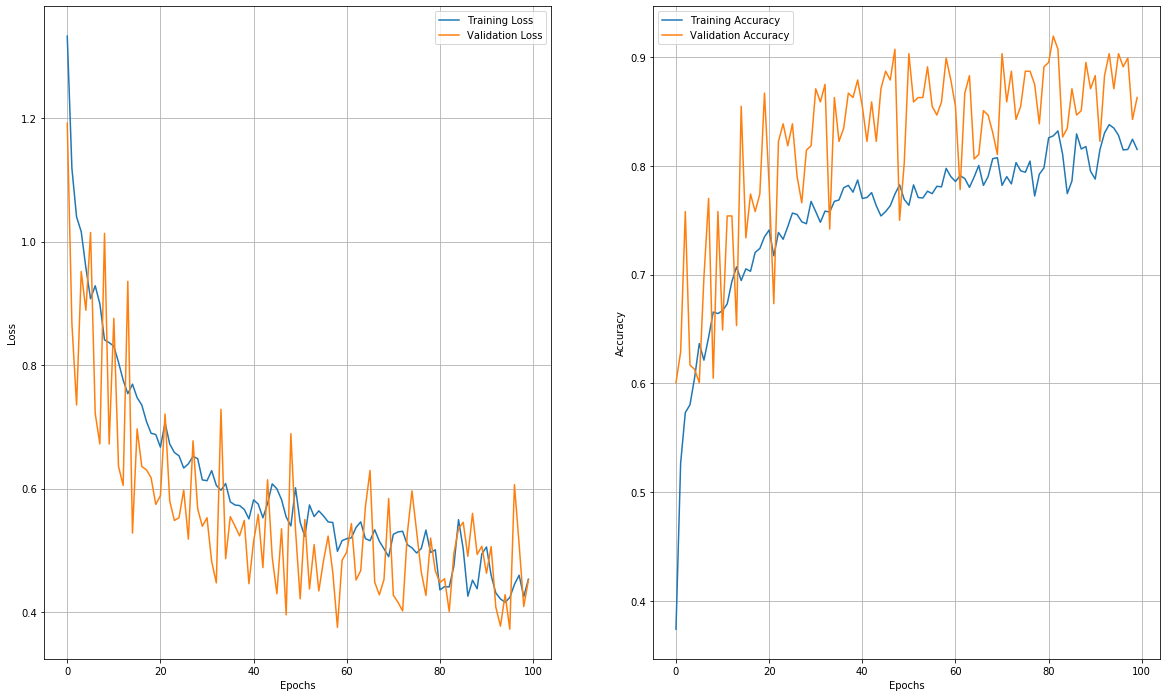

In [60]:
X = np.arange(0,EPOCHS,1)
plt.figure(1, figsize = (20, 12))
plt.subplot(1,2,1)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(X, history.history["loss"], label = "Training Loss")
plt.plot(X, history.history["val_loss"], label = "Validation Loss")
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(X, history.history["accuracy"], label = "Training Accuracy")
plt.plot(X, history.history["val_accuracy"], label = "Validation Accuracy")
plt.grid(True)
plt.legend()

In [61]:
del train_x
del val_x
del train_y
del val_y
del training_bottleneck_features
del validation_bottleneck_features

In [62]:
import gc
gc.collect()

7288

In [63]:
test_data

image_id
0     Test_0   
1     Test_1   
2     Test_2   
3     Test_3   
4     Test_4   
...      ...   
1816  Test_1816
1817  Test_1817
1818  Test_1818
1819  Test_1819
1820  Test_1820

[1821 rows x 1 columns]

In [64]:
# Now, it's time to test our model

In [65]:
test_image = []
for id in tqdm(test_data["image_id"][:5]):
    image = load_image(id)
    image = resize(image, IMAGE_SIZE)
    
    edge_image = canny_edge_detection(image)
    roi_image, _ = primary_roi(image, edge_image)
    equalized_roi_image = histogram_equalization(roi_image)
    
    test_image.append(image)

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [66]:
test_x = np.array(test_image)
test_x = test_x/255.0

In [67]:
test_bottleneck_features = get_bottleneck_features(vgg_model, test_x)

1/1 [==============================] - 0s 6ms/step


In [68]:
y_pred = model.predict(test_bottleneck_features)
y_pred.shape

(5, 4)

In [69]:
def convert_label(label) : 
    m = max(label)
    index = list(label).index(m)
    if index == 0 : 
        return "Healthy"
    elif index == 1 : 
        return "Multiple Diseased"
    elif index == 2 : 
        return "Rust"
    else:
        return "Scab"

Label of first testing image Rust
Label of first testing image Scab


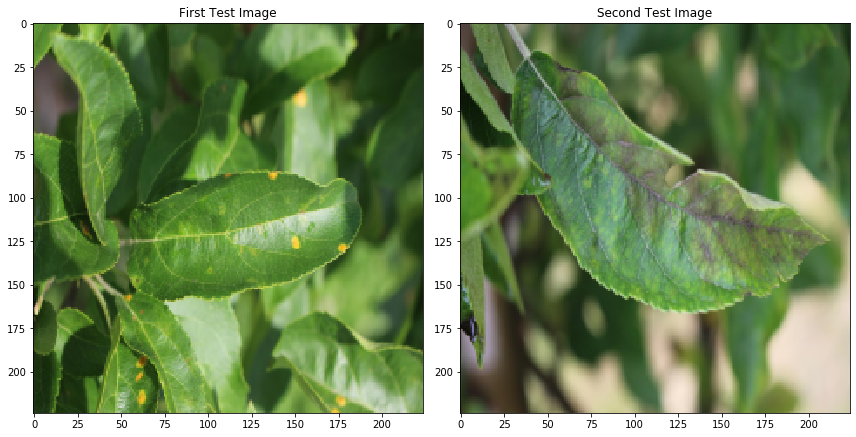

In [70]:
plt.figure(figsize = (12, 8))
plt.subplot(1,2,1)
plt.imshow(test_x[0], cmap = "gray")
label = convert_label(y_pred[0])
plt.grid(False)
plt.title("First Test Image")
print("Label of first testing image", label)

plt.subplot(1,2,2)
plt.imshow(test_x[2], cmap = "gray")
label = convert_label(y_pred[2])
plt.grid(False)
plt.title("Second Test Image")
print("Label of second testing image", label)

plt.tight_layout()